In [11]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df_random = pd.read_csv("data/first_large_run/run_number0.csv")
df_random_mixed_pop = pd.read_csv("data/first_large_run/run_number1.csv")
df_MultG2 = pd.read_csv("data/first_large_run/run_number2.csv")
df_MultG2_mixed_pop = pd.read_csv("data/first_large_run/run_number3.csv")
df_MultG6 = pd.read_csv("data/first_large_run/run_number4.csv")
df_MultG6_mixed_pop = pd.read_csv("data/first_large_run/run_number5.csv")
df_noisy = pd.read_csv("data/first_large_run/run_number6.csv")
df_noisy_mixed_pop = pd.read_csv("data/first_large_run/run_number7.csv")

pd.set_option('display.max_columns', None)
# df.head()

datasets = {
    'Random': df_random,
    'Random_mixed_pop': df_random_mixed_pop,
    'MultG2': df_MultG2,
    'MultG2_mixed_pop': df_MultG2_mixed_pop,
    'MultG6': df_MultG6,
    'MultG6_mixed_pop': df_MultG6_mixed_pop,
    'Noisy2': df_noisy,
    'Noisy2_mixed_pop': df_noisy_mixed_pop
}

In [ ]:
def plot_smt(name, datasets_dict):
    """
    datasets_dict: dictionary with {label: dataframe} pairs
    """
    curiosities = sorted(list(set().union(*[df["initial_curiosity"].unique() for df in datasets_dict.values()])))
    
    for label, df in datasets_dict.items():
        avg_values = [df[df["initial_curiosity"]==c][name].mean() for c in curiosities]
        std_values = [df[df["initial_curiosity"]==c][name].std() for c in curiosities]
        print(label, avg_values)
        if np.isnan(avg_values[0]):
            plt.hlines(avg_values[6], label=label)
        plt.errorbar(curiosities, avg_values, yerr=std_values, fmt='-o', label=label)
    
    plt.xlabel("Initial Curiosity")
    plt.ylabel(name)
    plt.title(f"{name} vs Initial Curiosity")
    plt.legend()
    plt.grid()
    plt.show()

### Key performance parameter: Share of explored knowledge

These plots show the share of knowledge harvested (first plot) and explore the relative speed of harvesting (second and third plot).

In [29]:
plot_smt("percentage_knowledge_harvested", datasets)
plot_smt("harvested_50_step", datasets)
plot_smt("harvested_90_step", datasets)

Random [np.float64(0.011903918188792566), np.float64(0.12741784039592227), np.float64(0.24820464021400027), np.float64(0.33040798821849243), np.float64(0.3811263071746519), np.float64(0.4110741689872988), np.float64(0.4172578902421054), np.float64(0.4200306204393442), np.float64(0.41896460845071654), np.float64(0.4198461934423593), np.float64(0.4192602472541598)]


AttributeError: 'numpy.float64' object has no attribute 'isnan'

### Descriptive parameters

For now this includes top shares of prestige to understand the accumulation of (perceived) scientific merit.

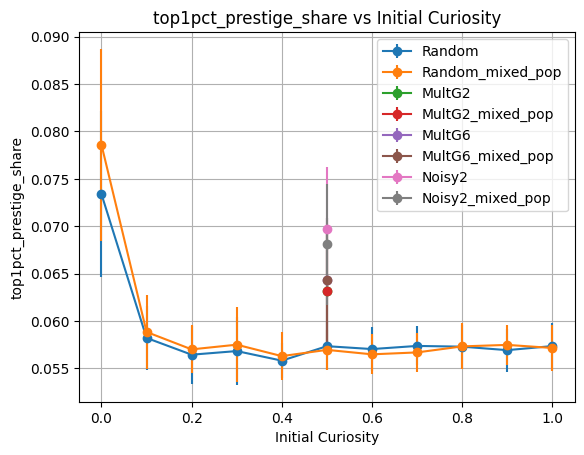

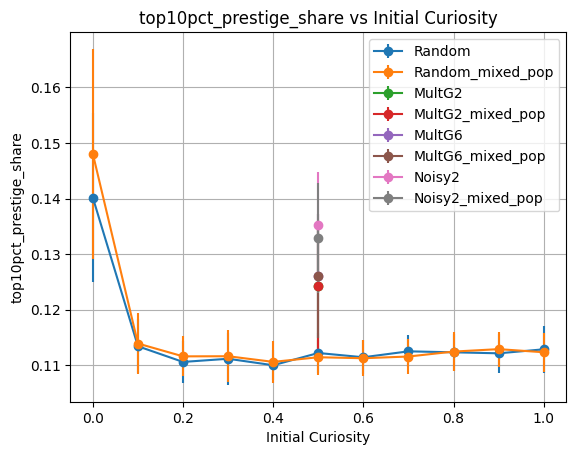

In [14]:
plot_smt("top1pct_prestige_share", datasets)
plot_smt("top10pct_prestige_share", datasets)

### Secondary performance parameter: Share of tiles touched (+ weighted version)

These plots show the share of (weighted vs. unweighted) tiles touched (first plot) and explore the relative speed of harvesting (second and third plot).

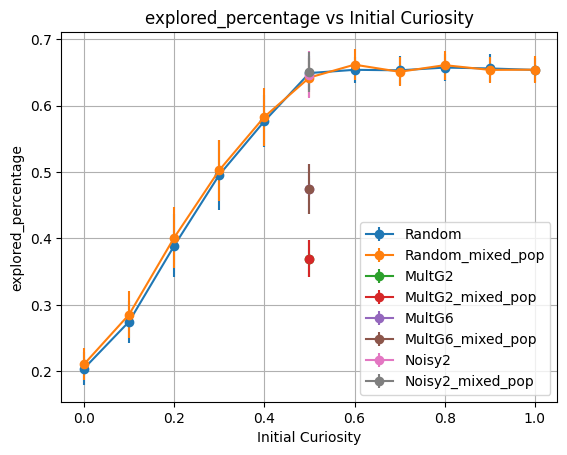

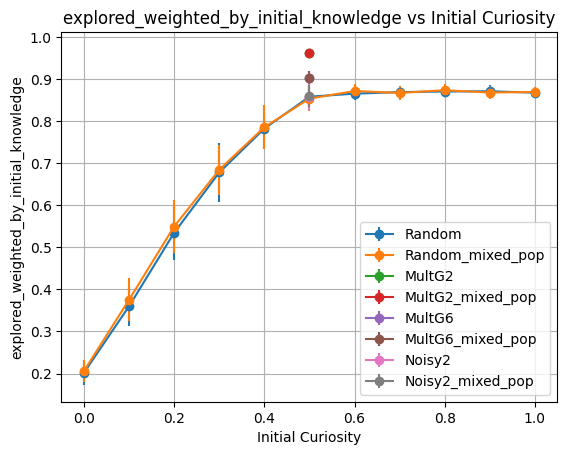

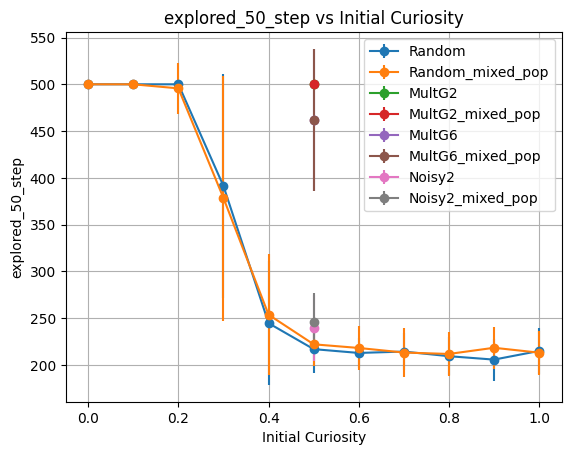

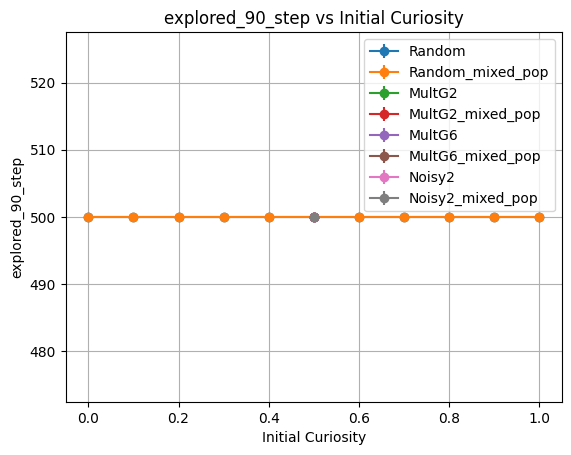

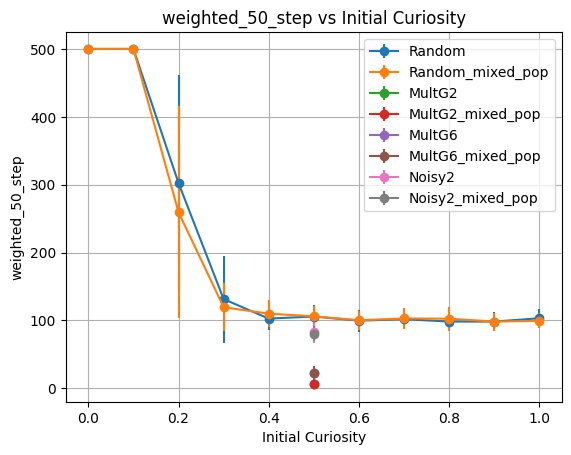

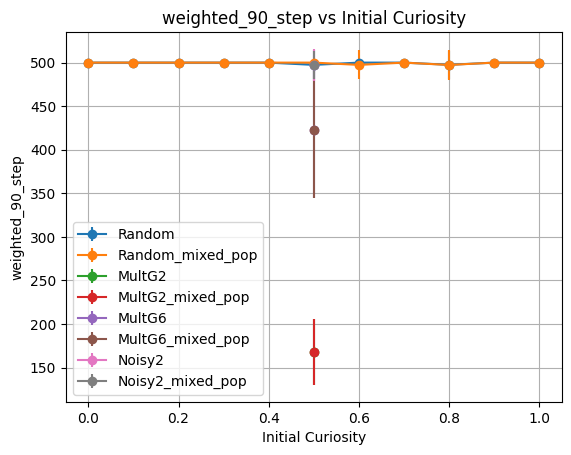

In [15]:
plot_smt("explored_percentage", datasets)
plot_smt("explored_weighted_by_initial_knowledge", datasets)
plot_smt("explored_50_step", datasets)
plot_smt("explored_90_step", datasets)
plot_smt("weighted_50_step", datasets)
plot_smt("weighted_90_step", datasets)

### Additional Parameters

Finally this section includes two plots showing average agent knowledge and remaining knowledge, which for now rather serve as a sanity check.

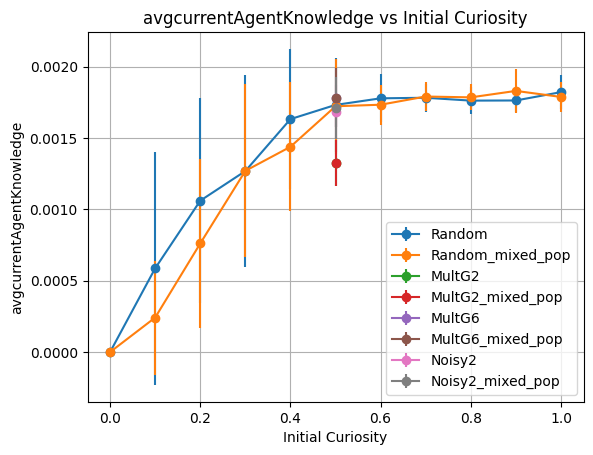

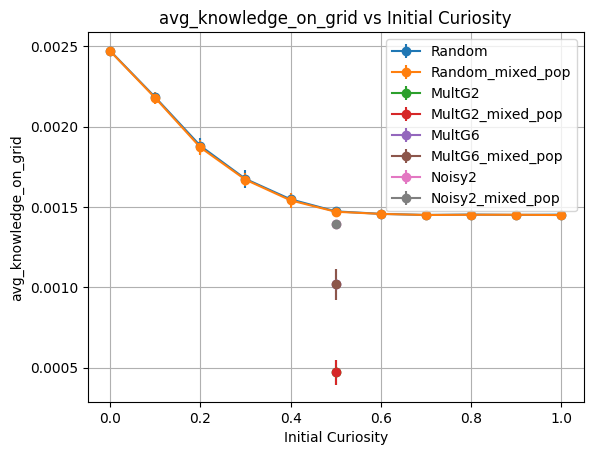

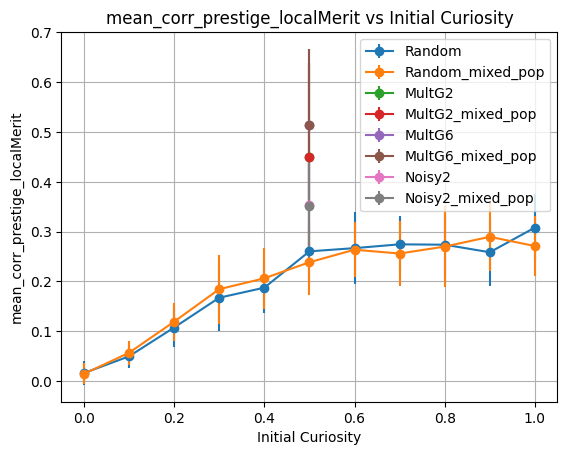

In [16]:
plot_smt("avgcurrentAgentKnowledge", datasets)
plot_smt("avg_knowledge_on_grid", datasets)
plot_smt("mean_corr_prestige_localMerit", datasets)



In [17]:
df_random.keys()

Index(['Step', 'agent_generation', 'avg_distance_between_agents',
       'avg_knowledge_on_grid', 'avgcurrentAgentKnowledge', 'best_knowledge',
       'corr_prestige_localMerit', 'epsilon', 'explored_50_step',
       'explored_90_step', 'explored_percentage',
       'explored_weighted_by_initial_knowledge', 'generation_params',
       'harvest', 'harvested_50_step', 'harvested_90_step',
       'initial_curiosity', 'mean_age', 'mean_corr_prestige_localMerit',
       'mean_prestige', 'mean_vanishing_prestige', 'mean_visibility_prestige',
       'new_questions', 'number_agents', 'number_connection',
       'percentage_knowledge_harvested', 'size', 'step_limit', 'steps',
       'top10pct_prestige_share', 'top1pct_prestige_share',
       'totalInitialKnowledge', 'total_initial_knowledge',
       'vanishing_factor_for_prestige', 'weighted_50_step',
       'weighted_90_step'],
      dtype='object')